<a href="https://colab.research.google.com/github/talalba/mixed_data_retail/blob/master/main_Image_or.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import the necessary packages
from sklearn.model_selection import train_test_split
import numpy as np
import argparse
import locale
import os
import pandas as pd
import csv
import glob
import os
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from tqdm import tqdm
from skimage.io import imread
from sklearn.model_selection import train_test_split
from pandas import read_excel
import cv2
import pathlib
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
# from models import models
import importlib
import locale
from random import randrange
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
# drive.mount('/content/drive')
import gzip



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
directoryPath = '/content/drive/My Drive/'
image_path = '/content/drive/My Drive//Colab Notebooks/images2/'
# ! ls /content/drive/My\ Drive/
data_all = pd.read_pickle(directoryPath+'dbo.data_all3.pkl')
# f = gzip.GzipFile(directoryPath+'data_images.npy.gz', "r")
# data_images = np.load(f)
# train_data_with_images = pd.read_pickle(directoryPath+'dbo.train_data_with_images.pkl')
target_variable = 'CPM'

# train_data = data_all[['Id_x','Impressions','AveragePosition','Sold','Rating',target_variable]]
train_data = data_all[['Id_x',target_variable,'Title','KeyWords']]
train_data = train_data.loc[train_data[target_variable]>0]
train_data = train_data.dropna()



,Id_x,CPM,Title,KeyWords
0,2517034,5000.00,Braun Forehead Touch Thermometer BFH175 New ! ...,Baby Thermometers
15,1224922,86.21,Duck Baby Bath Thermometer Card With New Movin...,Baby Thermometers
17,2473580,43.10,*LCD Digital Non-contact IR Infrared Thermomet...,Baby Thermometers
24,2506126,2500.00,Braun ThermoScan 7 IRT6520 Baby/Adult Professi...,Baby Thermometers
25,2504945,2000.00,Digital Infrared Forehead Body Thermometer Gun...,Baby Thermometers
...,...,...,...,...
41263,1783895,270.27,Baby Stroller Cup Holder Drink Bag Milk Bottle...,Baby Bottle Bags
41695,1222898,10000.00,Hearing Protection For Babies Ear Care,Baby Baby Hearing Protection Earmuffs
42065,1519584,2000.00,Portable Doctor Nurse Medical Trolley Toy Girl...,electric toys games and gadgets
42079,2943744,10000.00,Stainless Steel Touchless Handsfree Automatic ...,hands free soap dispenser


In [0]:
# loading training images and resize
train_img = []
id = []
heights = []
widths = []
i=0
for img_name in tqdm(train_data['Id_x'].values.astype(str)):
    # defining the image path
    path = image_path + img_name + '.jpg'
    try:
        # reading the image
        img = cv2.imread(path)
        heights.append(img.shape[0])
        widths.append(img.shape[1])
        # normalizing the pixel values
        # converting the type of pixel to float 32
        # img = img.astype('float32')
        # appending the image into the list
        img = cv2.resize(img, (128, 128))
        img = img/255.0
        train_img.append(img)
        id.append(img_name)
    except:
        pass

data_images =  np.array(train_img)
len(data_images)
len(id)
# type(data_images[1,1,1][0])

100%|██████████| 306/306 [00:06<00:00, 45.33it/s]


270

In [0]:
train_data_with_images = train_data.loc[train_data['Id_x'].isin(id)]

df = train_data_with_images.drop(['Id_x'],axis=1)

# df['CPM'] = np.log(df['CPM'])
images = data_images

split = train_test_split(df, images, test_size=0.4, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split


# cs = MinMaxScaler()
# trainX = cs.fit_transform(trainAttrX.drop([target_variable],axis=1))
# testX = cs.transform(testAttrX.drop([target_variable],axis=1))

# trainX = trainAttrX.drop([target_variable],axis=1).values
# testX = testAttrX.drop([target_variable],axis=1).values


# trainX.shape
# testX.shape

# trainAttrX[target_variable] = np.log(trainAttrX[target_variable])

maxPrice = trainAttrX[target_variable].max()
trainY = (trainAttrX[target_variable]/ maxPrice).values
testY = (testAttrX[target_variable]/ maxPrice).values

# trainY = (trainAttrX[target_variable]).values
# testY = (testAttrX[target_variable]).values


In [0]:
print(data_images.shape)
print(train_data_with_images.shape)

(265, 128, 128, 3)
(265, 4)


In [0]:
# # import the necessary packages
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation
# from keras.layers.core import Dropout
# from keras.layers.core import Dense
# from keras.layers import Flatten
# from keras.layers import Input
# from keras.models import Model
# def create_cnn(width, height, depth, filters=(16, 32, 64), regress=False):
# 	# initialize the input shape and channel dimension, assuming
# 	# TensorFlow/channels-last ordering
# 	inputShape = (height, width, depth)
# 	chanDim = -1

# 	# define the model input
# 	inputs = Input(shape=inputShape)

# 	# loop over the number of filters
# 	for (i, f) in enumerate(filters):
# 		# if this is the first CONV layer then set the input
# 		# appropriately
# 		if i == 0:
# 			x = inputs

# 		# CONV => RELU => BN => POOL
# 		x = Conv2D(f, (3, 3), padding="same")(x)
# 		x = Activation("relu")(x)
# 		x = BatchNormalization(axis=chanDim)(x)
# 		x = MaxPooling2D(pool_size=(2, 2))(x)
# 		# flatten the volume, then FC => RELU => BN => DROPOUT
# 		x = Flatten()(x)
# 		x = Dense(16)(x)
# 		x = Activation("relu")(x)
# 		x = BatchNormalization(axis=chanDim)(x)
# 		x = Dropout(0.5)(x)

# 		# apply another FC layer, this one to match the number of nodes
# 		# coming out of the MLP
# 		x = Dense(4)(x)
# 		x = Activation("relu")(x)

# 		# check to see if the regression node should be added
# 		if regress:
# 			x = Dense(1, activation="linear")(x)

# 		# construct the CNN
# 		model = Model(inputs, x)

# 		# return the CNN
# 		return model


In [0]:
# model = create_cnn(128, 128, 3, regress=True)
# opt = Adam(lr=1e-2, decay=1e-3 / 200)

import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import model_from_json
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
import numpy as np


# opt=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
input_shape = (128,128,3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(20, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(1))

model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.Adam(),
              metrics=['mae'])

# model.compile(loss="mean_absolute_percentage_error", optimizer=opt)
# train the model
print("[INFO] training model...")
# model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
# 	epochs=20, batch_size=8)
# preds = model.predict(testImagesX)

model.fit(images, df[target_variable]/df[target_variable].max(),
	epochs=20, batch_size=8,verbose=0)
preds = model.predict(images)


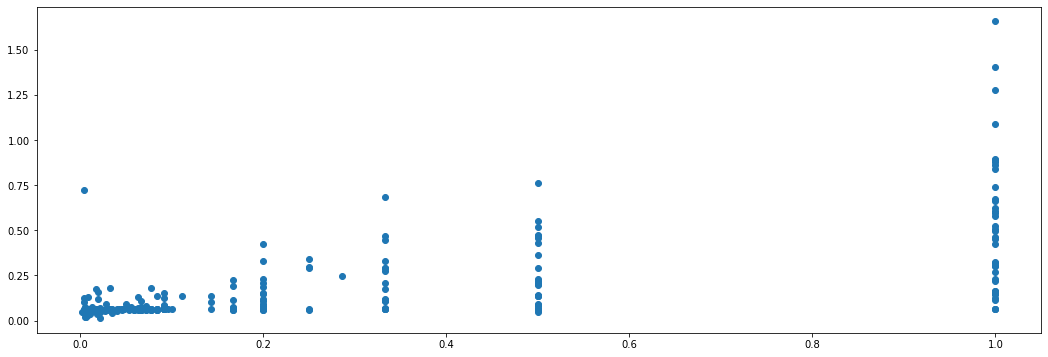

In [0]:
# plt.scatter(testY,preds.flatten())
model.save(directoryPath+'/'+'model.h5')

preds = model.predict(images)
import keras
# model = tf.keras.models.load_model(directoryPath+'model.h5')

plt.scatter(df[target_variable]/maxPrice,preds.flatten())

# preds.flatten().min

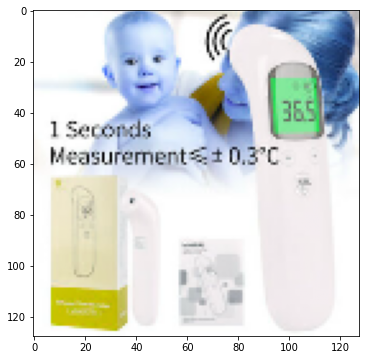

In [0]:
# visualize image in hidden layers
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:11]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

no = 5
img_tensor = images[no,:,:,:]
plt.imshow(images[no,:,:,:])
img_tensor = np.expand_dims(img_tensor, axis=0)

activations = activation_model.predict(img_tensor) 

first_layer_activation = activations[1]

# plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')



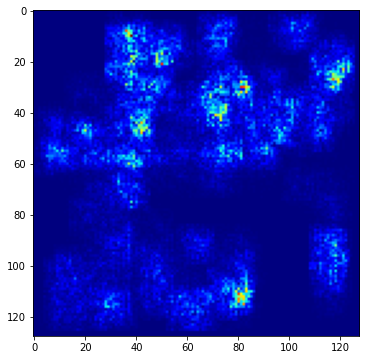

In [0]:
# saliency map
# import tensorflow.compat.v1 as tf
# from scipy.misc import imresize
from vis.utils import utils
# model.summary()
from vis.visualization import visualize_saliency


# from tensorflow.keras import backend
# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'dense_2')

# # Swap softmax with linear
# model.layers[layer_idx].activation = activations.linear
# model = utils.apply_modifications(model)


# !pip uninstall scipy
# !pip install scipy==1.1.0



#generating saliency map with unguided backprop
grads1 = visualize_saliency(model, layer_idx,filter_indices=None,seed_input=img_tensor)
#plotting the unguided saliency map
plt.imshow(grads1,cmap='jet')

# #generating saliency map with guided backprop
# grads2 =  visualize_saliency(model, layer_idx,filter_indices=None,seed_input=img_tensor,backprop_modifier='guided')
# #plotting the saliency map as heatmap
# plt.imshow(grads2,cmap='jet')

# # # 20 is the imagenet index corresponding to `ouzel`
# grads2 = visualize_saliency(model, layer_idx,filter_indices=None,
#                             seed_input=img_tensor, backprop_modifier='guided')
# # Lets overlay the heatmap onto original image.    
# plt.imshow(grads2, cmap='jet')

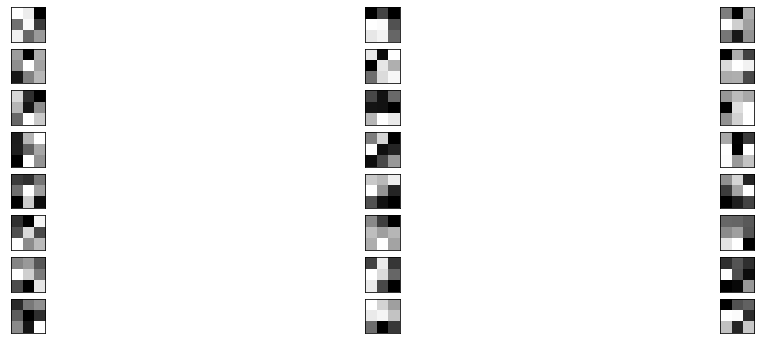

In [0]:
# visualize filters

from matplotlib import pyplot
# load the model
# retrieve weights from the second hidden layer
filters, biases = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 8, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

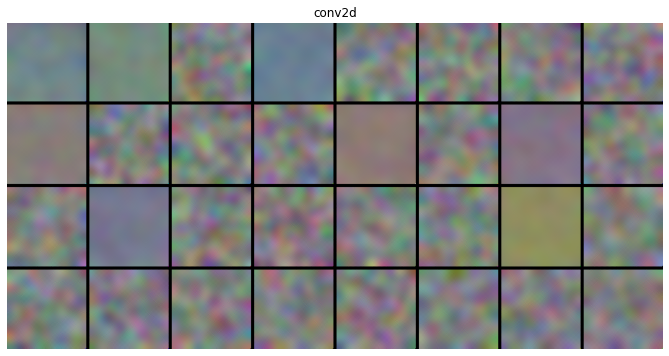

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
from vis.utils import utils
# !pip3 install scipy --user

from vis.visualization import get_num_filters
from vis.visualization import visualize_activation

# The name of the layer we want to visualize
# You can see this in the model definition.
layer_name = 'conv2d'
layer_idx = utils.find_layer_idx(model, layer_name)

# Visualize all filters in this layer.
filters = np.arange(get_num_filters(model.layers[layer_idx]))

# Generate input image for each filter.
vis_images = []
for idx in filters:
    img = visualize_activation(model, layer_idx, filter_indices=idx)
    
    # Utility to overlay text on image.
    img = utils.draw_text(img, 'Filter {}'.format(idx))    
    vis_images.append(img)

# Generate stitched image palette with 8 cols.
stitched = utils.stitch_images(vis_images, cols=8)    
plt.axis('off')
plt.imshow(stitched)
plt.title(layer_name)
plt.show()

In [0]:
outputs = [model.layers[i].output for i in ixs]
model2 = Model(inputs=model.inputs, outputs=outputs)
feature_maps = model2.predict(img_tensor)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
pyplot.show()

NameError: ignored

In [0]:
#importing required libraries and functions
from keras.models import Model
#defining names of layers from which we will take the output
layer_names = ['conv2d']
outputs = []
image = img_tensor
#extracting the output and appending to outputs
for layer_name in layer_names:
    intermediate_layer_model = Model(inputs=model.input,outputs=model.get_layer(layer_name).output)
    intermediate_output = intermediate_layer_model.predict(image)
    outputs.append(intermediate_output)
#plotting the outputs
fig,ax = plt.subplots(nrows=3,ncols=6,figsize=(15,15))

for i in range(3):
    for z in range(6):
        ax[i][z].imshow(outputs[i][0,:,:,z])
        ax[i][z].set_title(layer_names[i])
        ax[i][z].set_xticks([])
        ax[i][z].set_yticks([])
plt.savefig('layerwise_output.jpg')

TypeError: ignored

In [0]:
# !pip install keract
from keract import get_activations, display_heatmaps
keract_inputs = img_tensor
activations = get_activations(model, keract_inputs)
display_heatmaps(activations, keract_inputs, save=False)

AttributeError: ignored

In [0]:
#importing the required modules
from vis.visualization import visualize_activation
from vis.utils import utils
from keras import activations
from keras import applications
import matplotlib.pyplot as plt
from vis.input_modifiers import Jitter

%matplotlib inline
plt.rcParams['figure.figsize'] = (18,6)
input_img = model.layers[0].input
import tensorflow.keras.backend
#finding out the layer index using layer name
#the find_layer_idx function accepts the model and name of layer as parameters and return the index of respective layer
layer_idx = utils.find_layer_idx(model,'dense_3')
#changing the activation of the layer to linear
# model.layers[layer_idx].activation = activations.linear
#applying modifications to the model
# model = utils.apply_modifications(model)
#Indian elephant
img3 = visualize_activation(model,layer_idx,max_iter=50,input_modifiers=[Jitter(16)])
plt.imshow(img3)


In [0]:
selected_indices = []
layer_dict = dict([(layer.name, layer) for layer in model.layers])

layer_names = tuple(layer_dict.keys())
from vis.visualization import get_num_filters
from vis.utils import utils


for layer_name in [layer_names[0:4]]:
    layer_idx = utils.find_layer_idx(model, layer_name)

    # Visualize all filters in this layer.
    filters = np.random.permutation(get_num_filters(model.layers[layer_idx]))[:10]
    selected_indices.append(filters)

    # Generate input image for each filter.
    vis_images = []
    for idx in filters:
        img = visualize_activation(model, layer_idx, filter_indices=idx)

        # Utility to overlay text on image.
        img = utils.draw_text(img, 'Filter {}'.format(idx))    
        vis_images.append(img)

    # Generate stitched image palette with 5 cols so we get 2 rows.
    stitched = utils.stitch_images(vis_images, cols=5)    
    plt.figure()
    plt.axis('off')
    plt.imshow(stitched)
    plt.show()

ImportError: ignored

In [0]:
selected_indices = []
for layer_name in ['block2_conv2', 'block3_conv3', 'block4_conv3', 'block5_conv3']:
    layer_idx = utils.find_layer_idx(model, layer_name)

    # Visualize all filters in this layer.
    filters = np.random.permutation(get_num_filters(model.layers[layer_idx]))[:10]
    selected_indices.append(filters)

    # Generate input image for each filter.
    vis_images = []
    for idx in filters:
        img = visualize_activation(model, layer_idx, filter_indices=idx)

        # Utility to overlay text on image.
        img = utils.draw_text(img, 'Filter {}'.format(idx))    
        vis_images.append(img)

    # Generate stitched image palette with 5 cols so we get 2 rows.
    stitched = utils.stitch_images(vis_images, cols=5)    
    plt.figure()
    plt.axis('off')
    plt.imshow(stitched)
    plt.show()

In [0]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

inputShape=(128,128,3)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)



x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(1)(x)

model = Model(inputs = input,outputs = x,name='Predict')

# define SGD optimizer
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model.compile(loss='mae',optimizer=sgd, metrics=['mse'])

# lr = lr0 * drop^floor(epoch / epochs_drop)

import math
def step_decay(epoch):
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   
lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

history=model.fit(images, df[target_variable], 
                          epochs=35,callbacks=callbacks_list,verbose=1)

Epoch 1/35
270/270 [==============================] - 4s 13ms/step - loss: 423269641.6988 - mse: 34095624679891927040.0000
Epoch 2/35
270/270 [==============================] - 3s 11ms/step - loss: 304680.1458 - mse: 20364549685248.0000
Epoch 3/35
270/270 [==============================] - 3s 11ms/step - loss: 2818.2083 - mse: 19723164.0000
Epoch 4/35
270/270 [==============================] - 3s 11ms/step - loss: 97602.3961 - mse: 2425820807168.0000
Epoch 5/35
270/270 [==============================] - 3s 11ms/step - loss: 183834.2319 - mse: 8847932522496.0000
Epoch 6/35
270/270 [==============================] - 3s 11ms/step - loss: 2815.0998 - mse: 19705590.0000
Epoch 7/35
270/270 [==============================] - 3s 11ms/step - loss: 2814.4405 - mse: 19701870.0000
Epoch 8/35
270/270 [==============================] - 3s 10ms/step - loss: 2813.7925 - mse: 19698108.0000
Epoch 9/35
270/270 [==============================] - 3s 11ms/step - loss: 2813.2301 - mse: 19695080.0000
Epoch 10

KeyError: ignored

In [0]:
from keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(np.expand_dims(images[no,:,:,:], axis=0))

def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

display_activation(activations, 8, 8, 2)


TypeError: ignored

TypeError: ignored

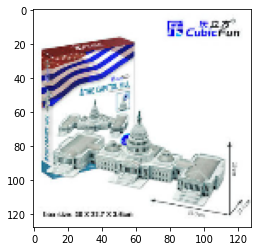

In [0]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model



no = 264
img_tensor = images[no,:,:,:]
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor.shape
plt.imshow(images[no,:,:,:])

# redefine model to output right after the first hidden layer
ixs = [2,3,4]
outputs = [model.layers[i].output for i in ixs]
model2 = Model(inputs=model.inputs, outputs=outputs)

feature_maps = model2.predict(img_tensor)
# plot the output from each block
square = 8
ixs = [2, 3,4]

for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1])
			ix += 1
	# show the figure
	pyplot.show()

In [0]:
classifier = model
layer_names = []
for layer in classifier.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


In [0]:
# model = create_cnn(128, 128, 3, regress=True)
# opt = Adam(lr=1e-2, decay=1e-3 / 200)

# model.compile(loss=keras.losses.mean_squared_error,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['mse'])
# model.fit(trainImagesX, trainY, validation_data=(testImagesX, testY),
# 	epochs=3, batch_size=8)
# preds = model.predict(testImagesX)

In [0]:
# # import the necessary packages
# from keras.models import Sequential
# from keras.layers.normalization import BatchNormalization
# from keras.layers.convolutional import Conv2D
# from keras.layers.convolutional import MaxPooling2D
# from keras.layers.core import Activation
# from keras.layers.core import Dropout
# from keras.layers.core import Dense
# from keras.layers import Flatten
# from keras.layers import Input
# from keras.models import Model
# from keras import optimizers

# model = Sequential()
# model.add(Dense(15, input_dim=trainX.shape[1], activation="relu"))
# # model.add(Dense(2, activation="relu"))
# model.add(Dense(1, activation="linear"))

# opt = Adam(lr=1e-4, decay=1e-2 / 200)
# # opt = optimizers.SGD(lr=0.01, momentum=0.0, nesterov=False)

# model.compile(loss="mean_squared_error", optimizer=opt)
# # train the model
# print("[INFO] training model...")
# model.fit(trainX, trainY, validation_data=(testX, testY),
# 	epochs=200, batch_size=8)
# preds = model.predict(testX)
# #

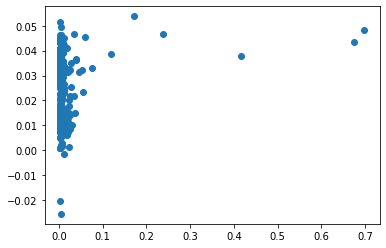

In [0]:
# plt.scatter(testY,preds.flatten())
